In [ ]:
!pip install feature-engine #Library for
 #Library for

/bin/bash: ip: command not found


In [ ]:
#Importing the necessary libraries for EDA and model building
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [ ]:
from feature_engine.imputation import RandomSampleImputer

In [ ]:
#Importing the data from a github repisotory

df = pd.read_csv('https://gist.githubusercontent.com/PUUDI/861771ffca8462507b487b6f75f2386d/raw/44e4760f1f6ee628c9674fe1c87e63bd4fbcf19d/gistfile1.txt')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df.Hand.unique() #all the datapoint are right handed

array(['R'], dtype=object)

In [ ]:
df.corr()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,1.000000,0.920009,0.183213,0.024615,-0.051622,-0.029078,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.920009,1.000000,0.205357,0.051630,-0.030813,0.065844,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.024615,0.051630,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.051622,-0.030813,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,-0.029078,0.065844,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,0.002325,-0.062915,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.117428,0.119624,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.126682,-0.105586,-0.518359,-0.012200,0.090095,0.341912,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.120399,-0.123545,-0.035067,-0.241752,0.255576,0.040052,-0.029340,-0.988877,0.213476,1.000000


In [ ]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
# set up the imputer
imputer = RandomSampleImputer(
        random_state=['SES','MMSE'],
        seed='observation',
        seeding_method='add'
    )

# fit the imputer
imputer.fit(df1)

RandomSampleImputer(random_state=['SES', 'MMSE'], seed='observation')

In [ ]:
df_2 = imputer.transform(df1)

In [ ]:
df_2.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df_2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,4.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,1.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,1.0,22.0,0.5,1698,0.701,1.034


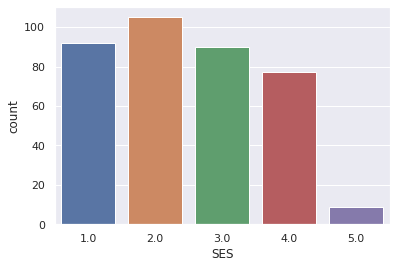

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="SES", data=df_2)

In [ ]:
# from google.colab import files
# df_2.to_csv('filename.csv') 
# files.download('filename.csv')

In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_2, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

# No. of training examples: 120
# No. of testing examples: 30

No. of training examples: 298
No. of testing examples: 75


In [ ]:
# from google.colab import files
# training_data.to_csv('train.csv') 
# files.download('train.csv')

# testing_data.to_csv('test.csv')
# files.download('test.csv')

In [ ]:
#Correlation matrix for contunious training dataset

import plotly.express as px

fig = px.scatter_matrix(training_data,
    dimensions=["MR Delay", "Age", "EDUC", "SES"],
    color="M/F")
fig.show()

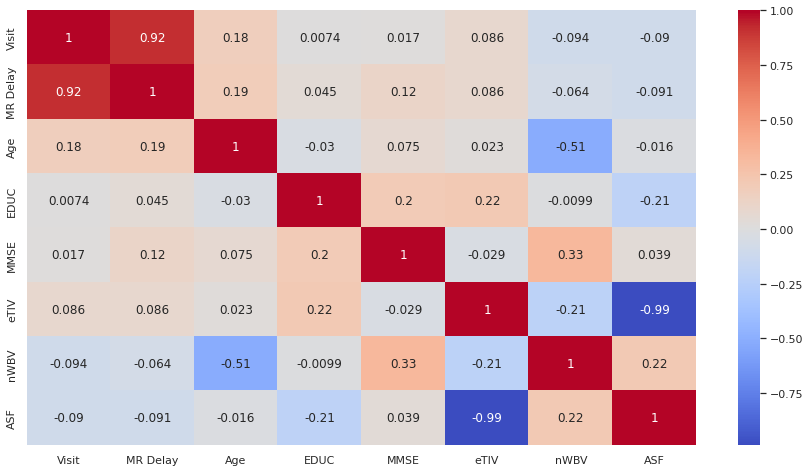

In [ ]:
corrMatrix = training_data[['Visit','MR Delay','Age', 'EDUC', 'MMSE' , 'eTIV' , 'nWBV','ASF']].corr()
plt.figure(figsize = (15,8))

sns.heatmap(corrMatrix, annot=True, cmap = 'coolwarm')

plt.show()

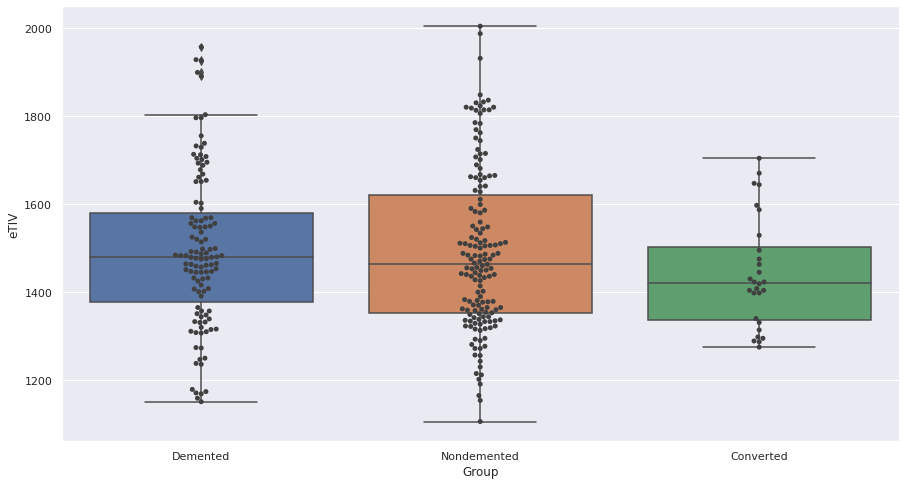

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(x="Group", y="eTIV", data=training_data)
ax = sns.swarmplot(x="Group", y="eTIV", data=training_data, color=".25")

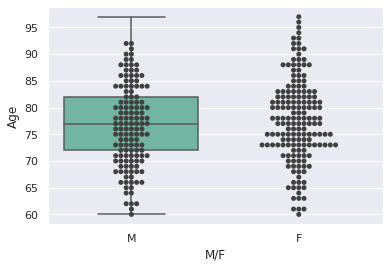

In [ ]:
ax = sns.boxplot(data=training_data[['Age']], palette="Set2")
ax = sns.swarmplot(x="M/F", y="Age", data=training_data, color=".25")


[Text(0, 0.5, 'Age'), Text(0.5, 0, 'Clinical Dimentia Rating')]

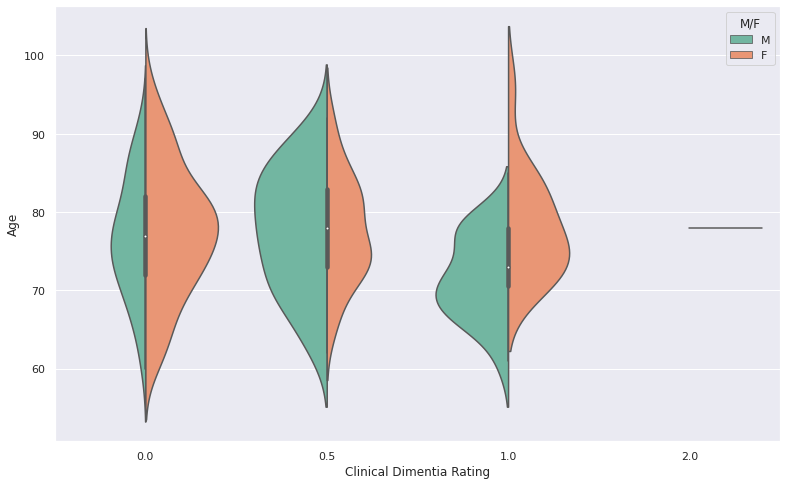

In [ ]:
plt.figure(figsize = (13,8))
ax = sns.violinplot(x="CDR", y="Age", hue="M/F",
                    data=training_data, palette="Set2", split=True,
                    scale="count" )
ax.set(xlabel='Clinical Dimentia Rating', ylabel='Age')

[None, None, None, None]

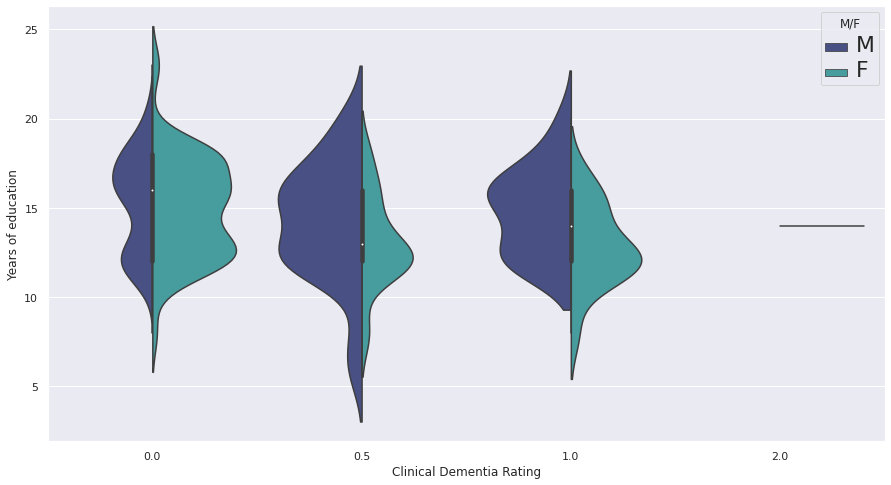

In [ ]:
plt.figure(figsize = (15,8))

ax = sns.violinplot(x="CDR", y="EDUC", hue="M/F",
                    data=training_data, palette="mako", split=True,
                    scale="count")
ax.set(ylabel='Years of education', xlabel='Clinical Dementia Rating')
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

[None, None, None, None, None, None, None, None]

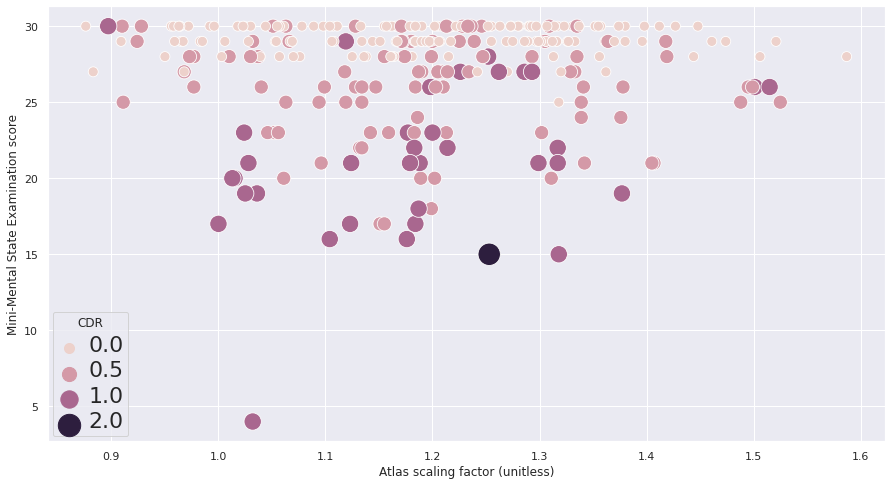

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.scatterplot(data=training_data, x="ASF", y="MMSE", hue="CDR",size = 'CDR',sizes=(100, 500))
ax.set(xlabel='Atlas scaling factor (unitless)', ylabel='Mini-Mental State Examination score')
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

[None, None, None, None, None, None, None, None]

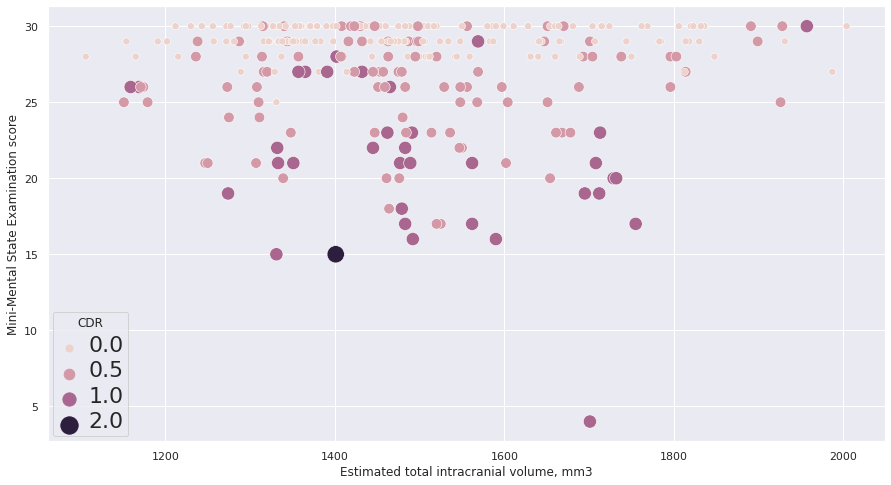

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.scatterplot(data=training_data, x="eTIV", y="MMSE", hue="CDR",size = 'CDR',sizes=(50, 300))
ax.set(xlabel='Estimated total intracranial volume, mm3', ylabel='Mini-Mental State Examination score')
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

In [ ]:
cross_tab_prop = pd.crosstab(index = training_data['SES'],
                             columns=training_data['Group'],
                             normalize="index")
cross_tab = pd.crosstab(index=training_data['SES'],
                        columns=training_data['Group'])

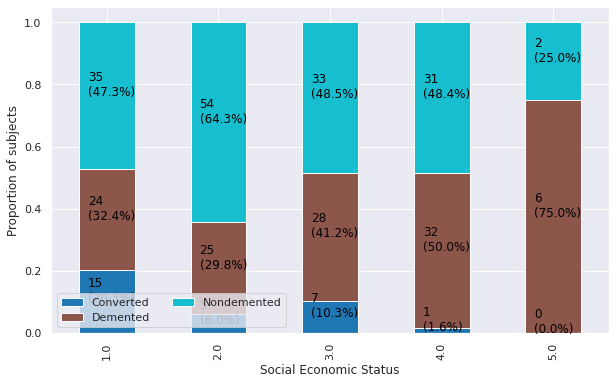

In [ ]:
cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Social Economic Status")
plt.ylabel("Proportion of subjects")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 )

plt.show()

[None, None, None, None]

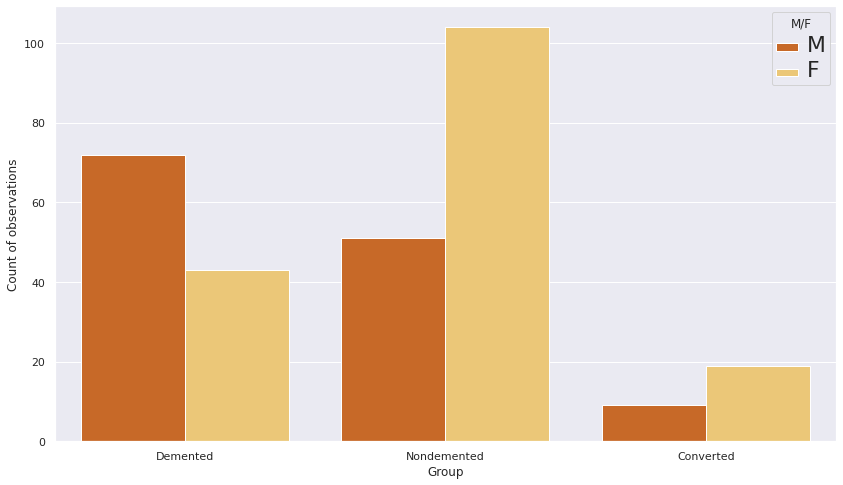

In [ ]:
plt.figure(figsize = (14,8))
ax = sns.countplot(x="Group", hue="M/F", data=training_data , palette="YlOrBr_r")
ax.set(ylabel='Count of observations')
plt.setp(ax.get_legend().get_texts(), fontsize='22')

[Text(0, 0.5, 'eTIV'), Text(0.5, 0, 'Group')]

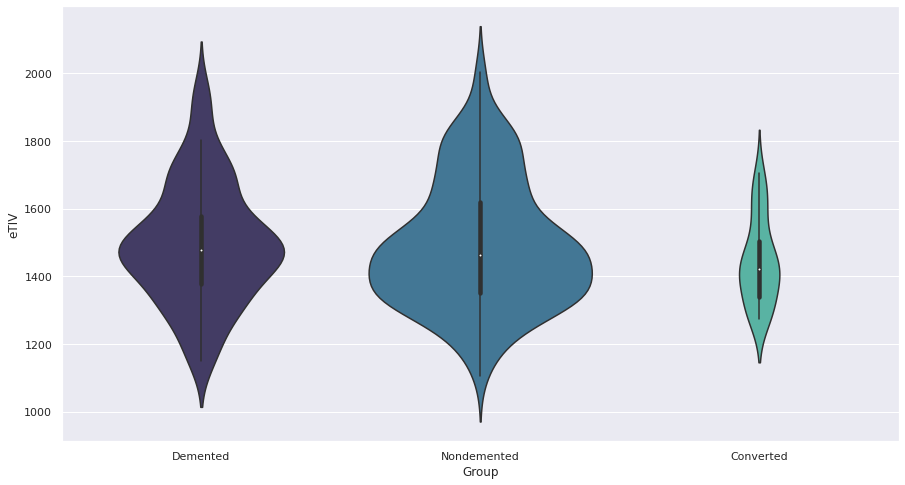

In [ ]:
plt.figure(figsize = (15,8))

ax = sns.violinplot(x="Group", y="eTIV",
                    data=training_data, palette="mako", split=True,
                    scale="count")
ax.set(ylabel='eTIV', xlabel='Group')
#plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

[Text(0, 0.5, 'MMSE'), Text(0.5, 0, 'nWBV')]

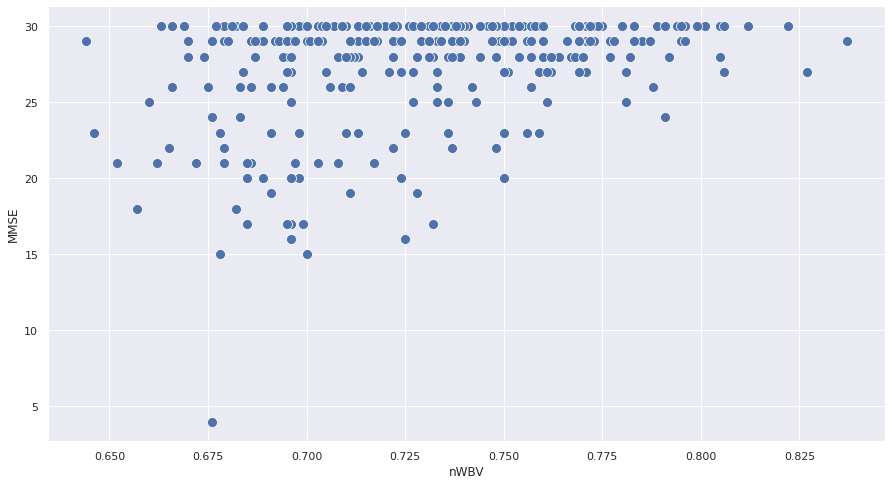

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.scatterplot(data=training_data, x="nWBV", y="MMSE", s=100)
ax.set(xlabel='nWBV', ylabel='MMSE')
#plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

[Text(0, 0.5, 'MMSE'), Text(0.5, 0, 'MR delay')]

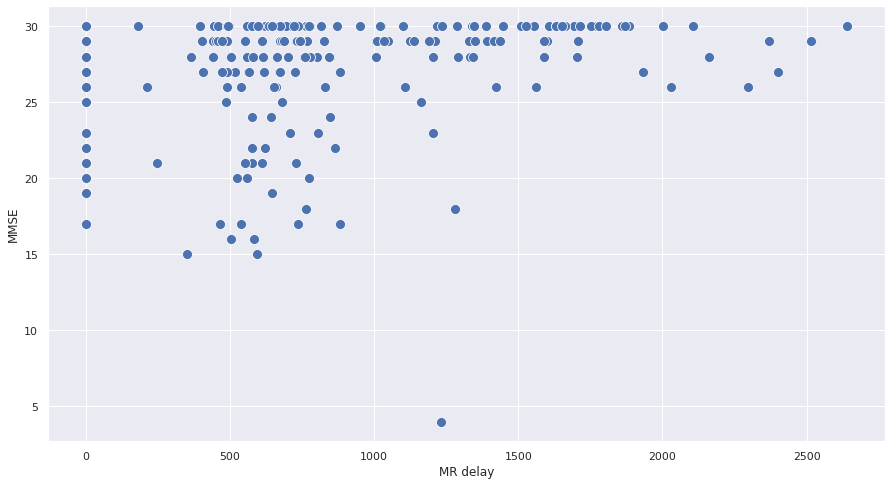

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.scatterplot(data=training_data, x="MR Delay", y="MMSE", s=100 , palette=['green'])
ax.set(xlabel='MR delay', ylabel='MMSE')
#plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

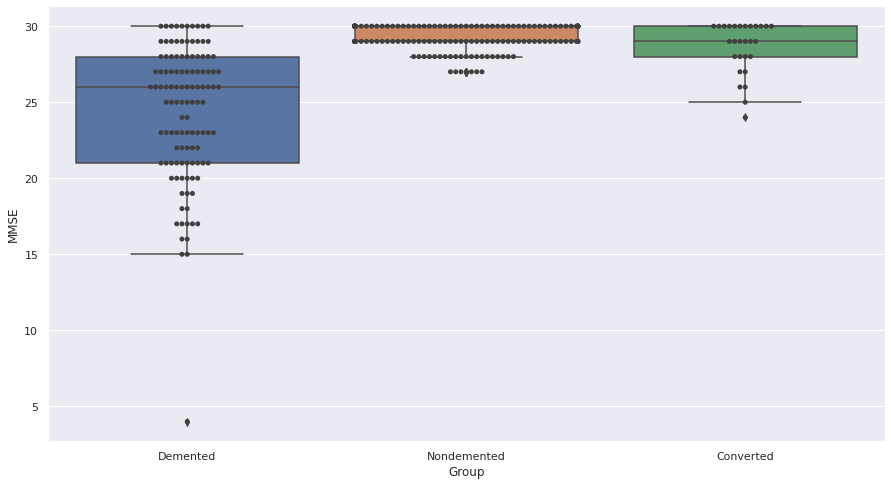

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(x="Group", y="MMSE", data=training_data)
ax = sns.swarmplot(x="Group", y="MMSE", data=training_data, color=".25")

[Text(0, 0.5, 'Count of observations')]

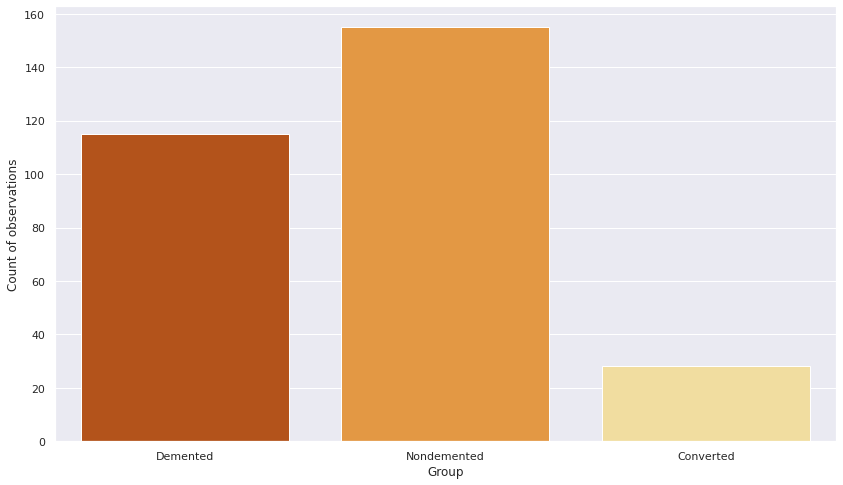

In [ ]:
plt.figure(figsize = (14,8))
ax = sns.countplot(x="Group",data=training_data , palette="YlOrBr_r")
ax.set(ylabel='Count of observations')
#plt.setp(ax.get_legend().get_texts(), fontsize='22')

In [ ]:
Y = training_data[['MMSE']]
X = np.arange(0,len(Y))

In [ ]:
Y = Y.values

In [ ]:
from pyod.models.pca import PCA
Y = Y.reshape(-1, 1)
clf = PCA()
clf.fit(Y)
outliers = clf.predict(Y)

In [ ]:
np.where(outliers==1)

(array([ 15,  44, 106, 134, 152, 163, 179, 188, 222, 265]),)

In [ ]:
Y_outliers = Y[np.where(outliers==1)]
X_outliers = X[np.where(outliers==1)]
Y_inliers = Y[np.where(outliers==0)]
X_inliers = X[np.where(outliers==0)]

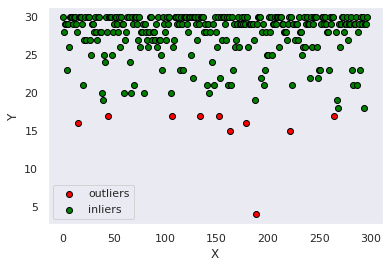

In [ ]:
plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label='outliers')
plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='green', label='inliers')
plt.legend()
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [ ]:
anomaly_score = clf.decision_function(Y)

In [ ]:
def outliers_detection(model, name):
    clf = model
    clf.fit(Y)
    
    outliers = clf.predict(Y)
    
    Y_outliers = Y[np.where(outliers==1)]
    X_outliers = X[np.where(outliers==1)]
    
    Y_inliers = Y[np.where(outliers==0)]
    X_inliers = X[np.where(outliers==0)]
    print(X_outliers)
    
    
    plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label='outliers')
    plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='green', label='inliers')
    plt.title(name)
    plt.legend()
    plt.grid()
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.show()
    
    anomaly_score = clf.decision_function(Y)
    min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(outliers==1)])*10)/10
    plt.hist(anomaly_score, bins=n_bins)
    plt.axvline(min_outlier_anomaly_score, c='k')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Number of data points')
    plt.show()
    return anomaly_score

In [ ]:
!pip install pyod

[ 15  44 106 134 152 163 179 188 222 265]


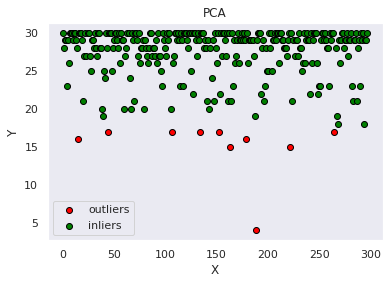

NameError: ignored

In [ ]:
from pyod.models.pca import PCA
model = PCA()
anomaly_score = outliers_detection(model, 'PCA')